<a href="https://colab.research.google.com/github/mayaarosama/Devices-Price-Classification/blob/main/Devices_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

 This notebook is part of a job application for AI Engineer position at maids.cc
## **Aim** - To Build a Devices Price Classification System;
The goal is to develop a price prediction for the devices, and accordingly to classify it into four categories; low, medium, high, and very high cost.

The prediction should take into consideration the device specifications which include categorial factors and numerical range factors.

## The notebook is divided into:
* Data Analysis and Exploration
* Data Cleaning (if needed)
* Embedding approaches for the differnt factors representations
* Neural Network Model for the prediction and classification task
* Testing section using the [Test dataset](https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844) to evaluate the model

Dataset was downloaded through the link provided in the task description [Devices specifications Train Datataset](https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers

# Dataset Description
The devices specifications are divided into categorial specifications and numerical range specifications.

### Categorial Factors:
1. blue: Binary has Bluetooth or not
2. dual_sim: Binary has dual sim support or not
3. four_g: Binary has 4G or not
4. three_g: Binary has 3G or not
5. touch_screen: Binary has touch screen or not
6. wifi: Binary has wifi or not
7. price_range: 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)

### Numerical Range Factors:
1. battery_power: Total energy a battery can store in one time measured in mAh
2. clock_speed: The speed at which the microprocessor executes instructions
3. fc: Front Camera megapixels
4. int_memory: Internal Memory in Gigabytes
5. m_dep: Mobile Depth in cm
6. mobile_wt: Weight of mobile phone
7. n_cores: Number of cores of the processor
8. pc: Primary Camera megapixels
9. px_height: Pixel Resolution Height
10. px_width: Pixel Resolution Width
11. ram: Random Access Memory in Megabytes
12. sc_h: Screen Height of mobile in cm
13. sc_w: Screen Width of mobile in cm
14. talk_time: longest time that a single battery charge will last when you are


In [7]:
df_train = pd.read_csv("train - train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


The training dataset contains 2000 rows and 21 columns

In [14]:
df_train.shape

(2000, 21)

In [11]:
df_train.count() # counting the number of entities per column

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               1995
four_g           1995
int_memory       1995
m_dep            1995
mobile_wt        1996
n_cores          1996
pc               1995
px_height        1996
px_width         1998
ram              1998
sc_h             1999
sc_w             1999
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [12]:
df_train.isna().sum() # counting the empty values per column

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
df_train.isna().sum().sum() #to count the total occurrences of null in all columns

43

Because the number of null cells will affect the model, and since the count of null occurrences is small we can drop them to reduce error propagation

In [15]:
df_train = df_train.dropna()
df_train.isna().sum().sum()

0

In [16]:
df_train.shape

(1991, 21)

# Data Anlysis
This step is optional, but its useful to understand the type of data we are working with.
In addition to visualizing the ranges and identifying any baise in the data.

In [9]:
def plot_class_counts(df, column_name):
    # Count the occurrences of each class
    class_counts = df[column_name].value_counts()
    print(class_counts)
    # Plot the count of classes
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.title('Class Counts')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



Since our main task is price classification task, we need to check if the data is balanced across classes

price_range
2    499
0    499
3    497
1    496
Name: count, dtype: int64


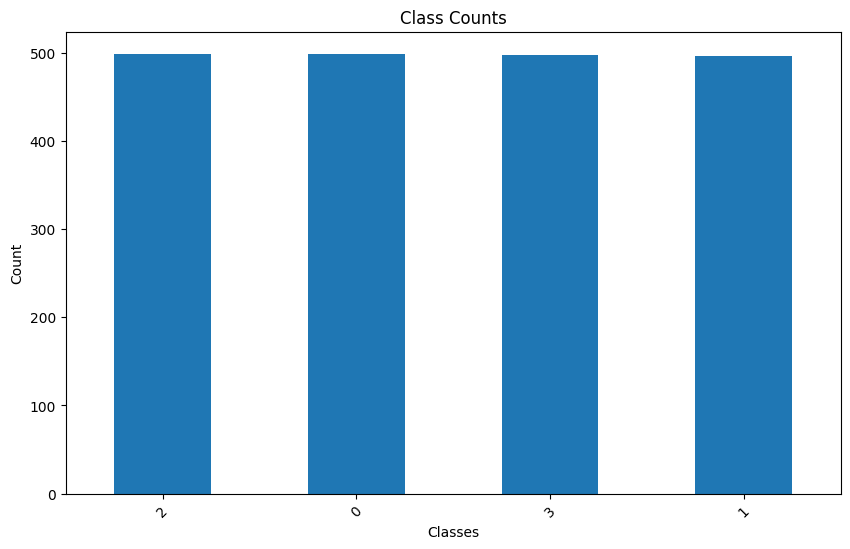

In [17]:
plot_class_counts(df_train,'price_range')

From the above plot and values we can see that the dataset is balanced.

Now plotting the range of each of the numerical factors.


In [22]:
col_names = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt',
          'n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

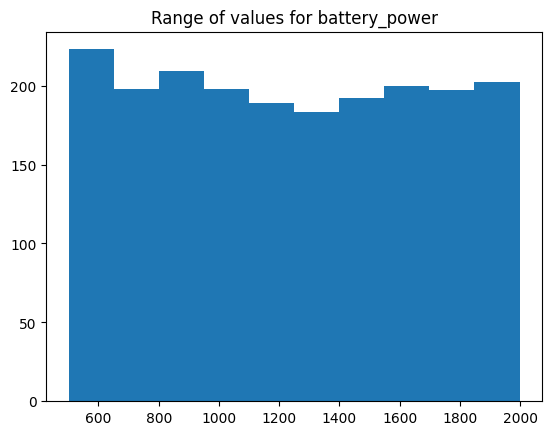

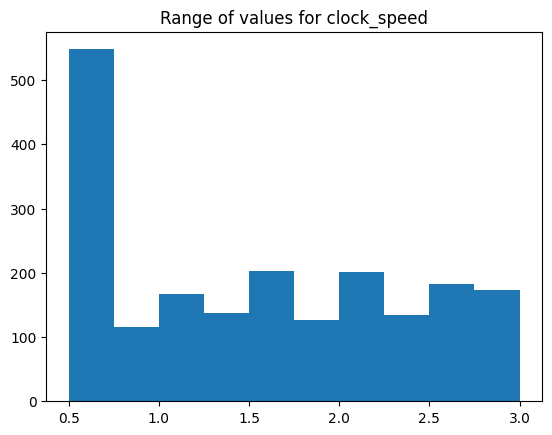

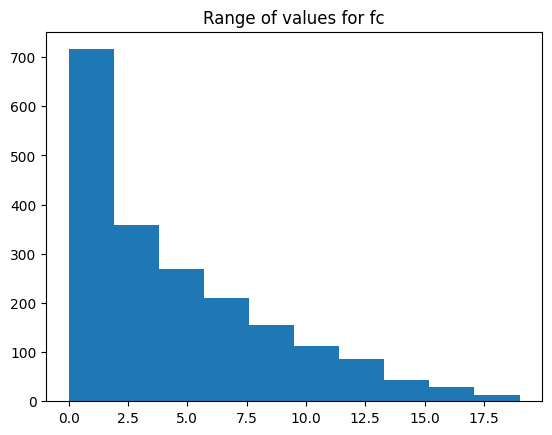

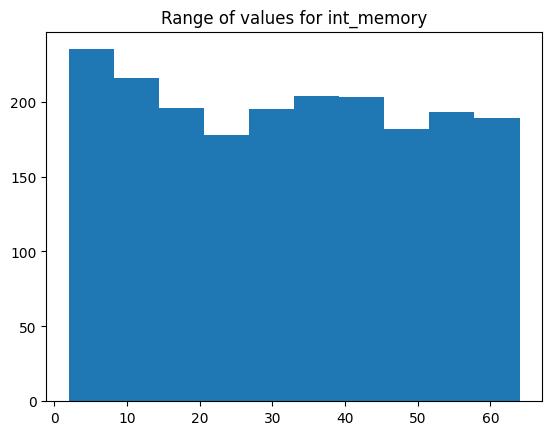

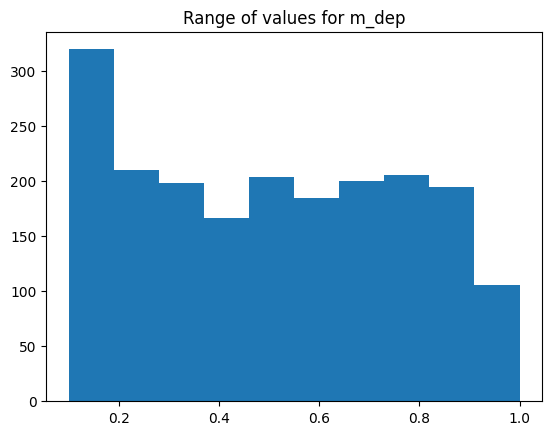

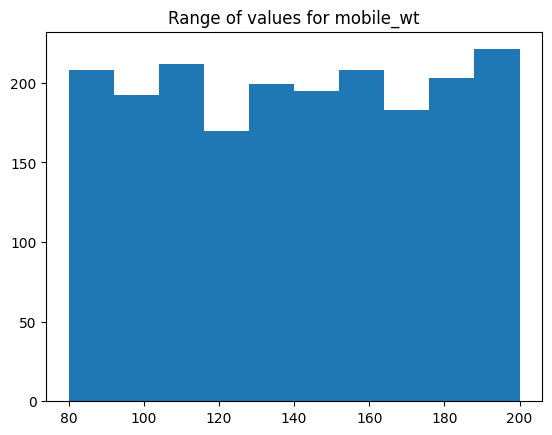

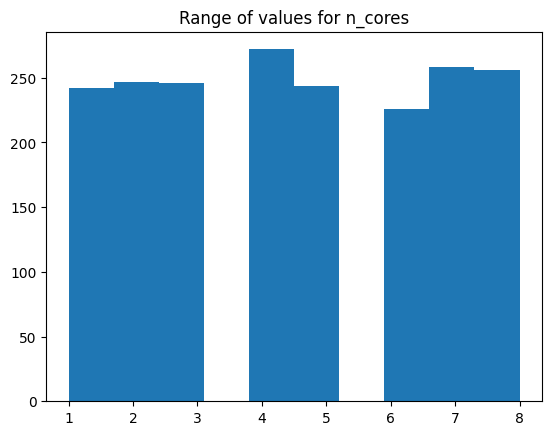

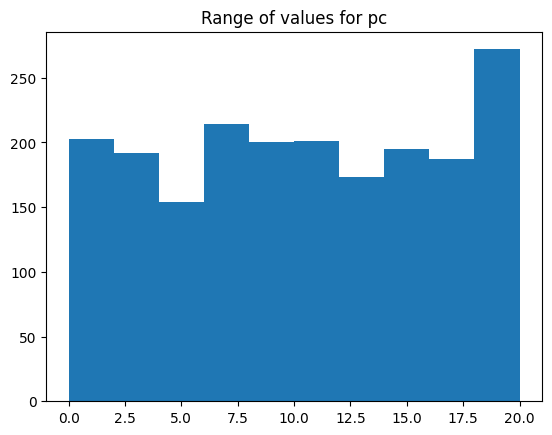

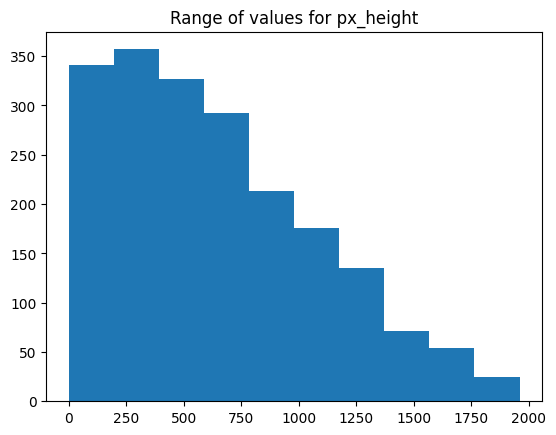

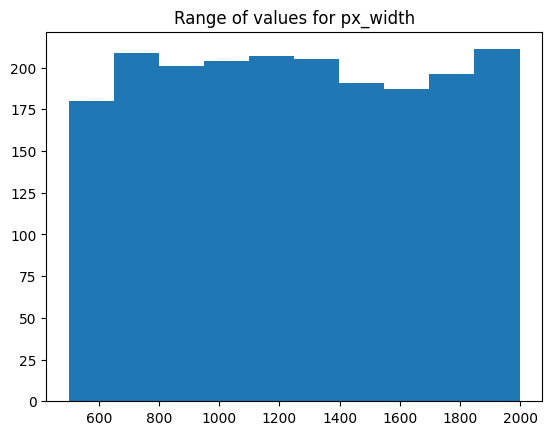

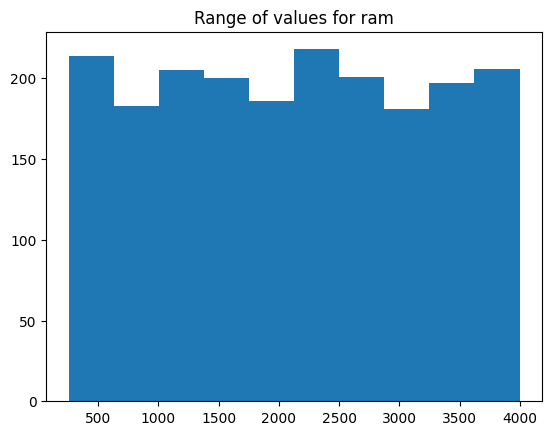

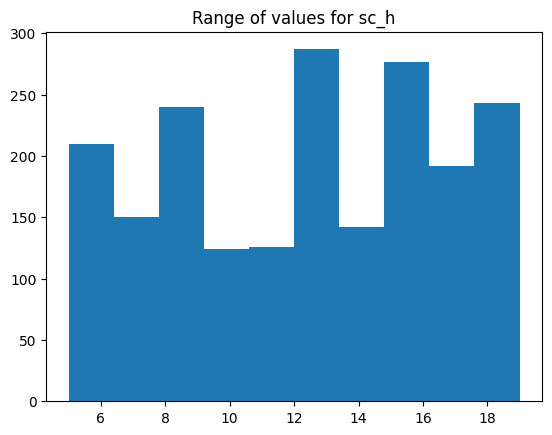

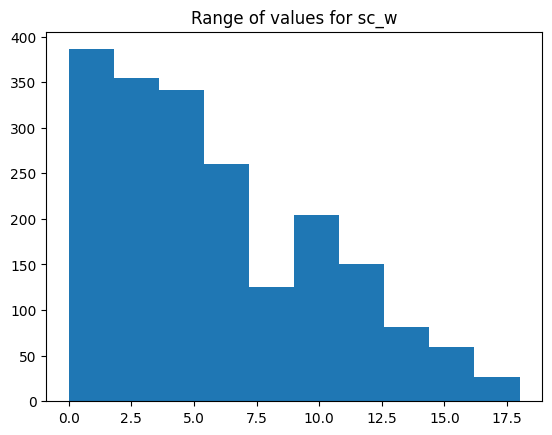

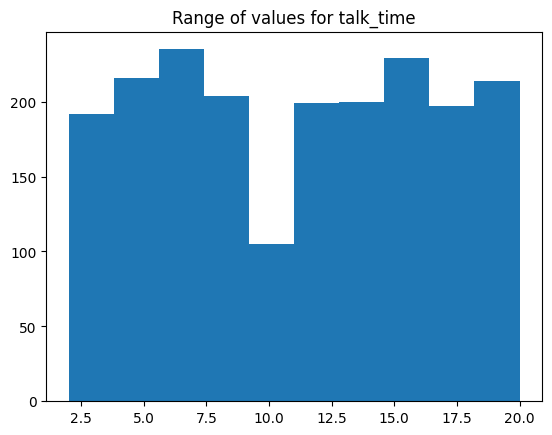

In [23]:
'''
Plot the range of values for each column.
 x-axis display the range of values present in the column
 and  the y-axis display the frequency/count of occurrences of those values within each bin
'''
for col_name in col_names:
    plt.figure()
    plt.hist(df_train[col_name], bins=10)
    plt.title(f'Range of values for {col_name}')
    plt.show()


In [79]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_train, test_size=0.1)

df_train, df_val = train_test_split(df_train, test_size=0.2)


# Data Pre-processing and Encoding

In [80]:

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("price_range")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(df_train)
val_ds = dataframe_to_dataset(df_val)


Each `Dataset` yields a tuple `(input, target)` where `input` is a dictionary of features
and `target` is the price category [0-3]:

In [81]:
for x, y in train_ds.take(3):
    print("Input:", x)
    print("Target:", y)

Input: {'battery_power': <tf.Tensor: shape=(), dtype=int64, numpy=1099>, 'blue': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'clock_speed': <tf.Tensor: shape=(), dtype=float64, numpy=0.5>, 'dual_sim': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fc': <tf.Tensor: shape=(), dtype=float64, numpy=13.0>, 'four_g': <tf.Tensor: shape=(), dtype=float64, numpy=1.0>, 'int_memory': <tf.Tensor: shape=(), dtype=float64, numpy=61.0>, 'm_dep': <tf.Tensor: shape=(), dtype=float64, numpy=0.3>, 'mobile_wt': <tf.Tensor: shape=(), dtype=float64, numpy=146.0>, 'n_cores': <tf.Tensor: shape=(), dtype=float64, numpy=3.0>, 'pc': <tf.Tensor: shape=(), dtype=float64, numpy=20.0>, 'px_height': <tf.Tensor: shape=(), dtype=float64, numpy=393.0>, 'px_width': <tf.Tensor: shape=(), dtype=float64, numpy=1096.0>, 'ram': <tf.Tensor: shape=(), dtype=float64, numpy=1699.0>, 'sc_h': <tf.Tensor: shape=(), dtype=float64, numpy=17.0>, 'sc_w': <tf.Tensor: shape=(), dtype=float64, numpy=10.0>, 'talk_time': <tf.Tensor: shape=()

In [82]:

def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string=False):
    lookup_class = layers.StringLookup if is_string else layers.IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature


# Prediction Model

## Build a model



Defining the input layer per feature

Categorical features encoded as integers

In [83]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)


In [84]:
all_inputs = []
features_encoders=[]


blue = keras.Input(shape=(1,), name="blue", dtype="int64")
all_inputs.append(blue)
blue_encoded = encode_categorical_feature(blue, "blue", train_ds)
features_encoders.append(blue_encoded)

dual_sim = keras.Input(shape=(1,), name="dual_sim", dtype="int64")
all_inputs.append(dual_sim)
dual_sim_encoded = encode_categorical_feature(dual_sim, "dual_sim", train_ds)
features_encoders.append(dual_sim_encoded)

four_g = keras.Input(shape=(1,), name="four_g", dtype="int64")
all_inputs.append(four_g)
four_g_encoded = encode_categorical_feature(four_g, "four_g", train_ds)
features_encoders.append(four_g_encoded)

three_g= keras.Input(shape=(1,), name="three_g", dtype="int64")
all_inputs.append(three_g)
three_g_encoded = encode_categorical_feature(three_g, "three_g", train_ds)
features_encoders.append(three_g_encoded)

touch_screen=keras.Input(shape=(1,), name="touch_screen", dtype="int64")
all_inputs.append(touch_screen)
touch_screen_encoded = encode_categorical_feature(touch_screen, "touch_screen", train_ds)
features_encoders.append(touch_screen_encoded)

wifi=keras.Input(shape=(1,), name="wifi", dtype="int64")
all_inputs.append(wifi)
wifi_encoded = encode_categorical_feature(wifi, "wifi", train_ds)
features_encoders.append(wifi_encoded)


Numerical features encoding

In [85]:

battery_power = keras.Input(shape=(1,), name="battery_power")
all_inputs.append(battery_power)
battery_power_encoded=encode_numerical_feature(battery_power, "battery_power", train_ds)
features_encoders.append(battery_power_encoded)

clock_speed= keras.Input(shape=(1,), name="clock_speed")
all_inputs.append(clock_speed)
clock_speed_encoded=encode_numerical_feature(clock_speed, "clock_speed", train_ds)
features_encoders.append(clock_speed_encoded)

fc= keras.Input(shape=(1,), name="fc")
all_inputs.append(fc)
fc_encoded=encode_numerical_feature(fc, "fc", train_ds)
features_encoders.append(fc_encoded)

int_memory= keras.Input(shape=(1,), name="int_memory")
all_inputs.append(int_memory)
int_memory_encoded=encode_numerical_feature(int_memory, "int_memory", train_ds)
features_encoders.append(int_memory_encoded)

m_dep= keras.Input(shape=(1,), name="m_dep")
all_inputs.append(m_dep)
m_dep_encoded=encode_numerical_feature(m_dep,"m_dep", train_ds)
features_encoders.append(m_dep_encoded)

mobile_wt = keras.Input(shape=(1,), name="mobile_wt")
all_inputs.append(mobile_wt)
mobile_wt_encoded=encode_numerical_feature(mobile_wt, "mobile_wt", train_ds)
features_encoders.append(mobile_wt_encoded)

n_cores=  keras.Input(shape=(1,), name="n_cores")
all_inputs.append(n_cores)
n_cores_encoded=encode_numerical_feature(n_cores, "n_cores", train_ds)
features_encoders.append(n_cores_encoded)

pc=  keras.Input(shape=(1,), name="pc")
all_inputs.append(pc)
pc_encoded=encode_numerical_feature(pc, "pc", train_ds)
features_encoders.append(pc_encoded)

px_height = keras.Input(shape=(1,), name="px_height")
all_inputs.append(px_height)
px_height_encoded=encode_numerical_feature(px_height, "px_height", train_ds)
features_encoders.append(px_height_encoded)

px_width = keras.Input(shape=(1,), name="px_width")
all_inputs.append(px_width)
px_width_encoded=encode_numerical_feature(px_width,"px_width", train_ds)
features_encoders.append(px_width_encoded)

ram = keras.Input(shape=(1,), name="ram")
all_inputs.append(ram)
ram_encoded=encode_numerical_feature(ram, "ram", train_ds)
features_encoders.append(ram_encoded)

sc_h = keras.Input(shape=(1,), name="sc_h")
all_inputs.append(sc_h)
sc_h_encoded=encode_numerical_feature(sc_h,"sc_h", train_ds)
features_encoders.append(sc_h_encoded)

sc_w = keras.Input(shape=(1,), name="sc_w")
all_inputs.append(sc_w)
sc_w_encoded=encode_numerical_feature(sc_w, "sc_w", train_ds)
features_encoders.append(sc_w_encoded)

talk_time= keras.Input(shape=(1,), name="talk_time")
all_inputs.append(talk_time)
talk_time_encoded=encode_numerical_feature(talk_time, "talk_time", train_ds)
features_encoders.append(talk_time_encoded)



In [86]:
len(all_inputs) #To make sure that no fetaure went missing during the manual adding step

20

Building the model as follows:


1.   Concatinating all the encoded features
2.   Pass the encodings to a dense layer to extract the features/pattern
3.   Having a dropout layer is optional, but to avoid overfitting (best practice)
4.   Finally the output layer, at which we decide on the output shape. In this problem we categorize the output into 4 categories, hence, we need a softmax function that would predict the output probability of each class.



In [87]:

all_features = layers.concatenate(
   features_encoders
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation="softmax")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

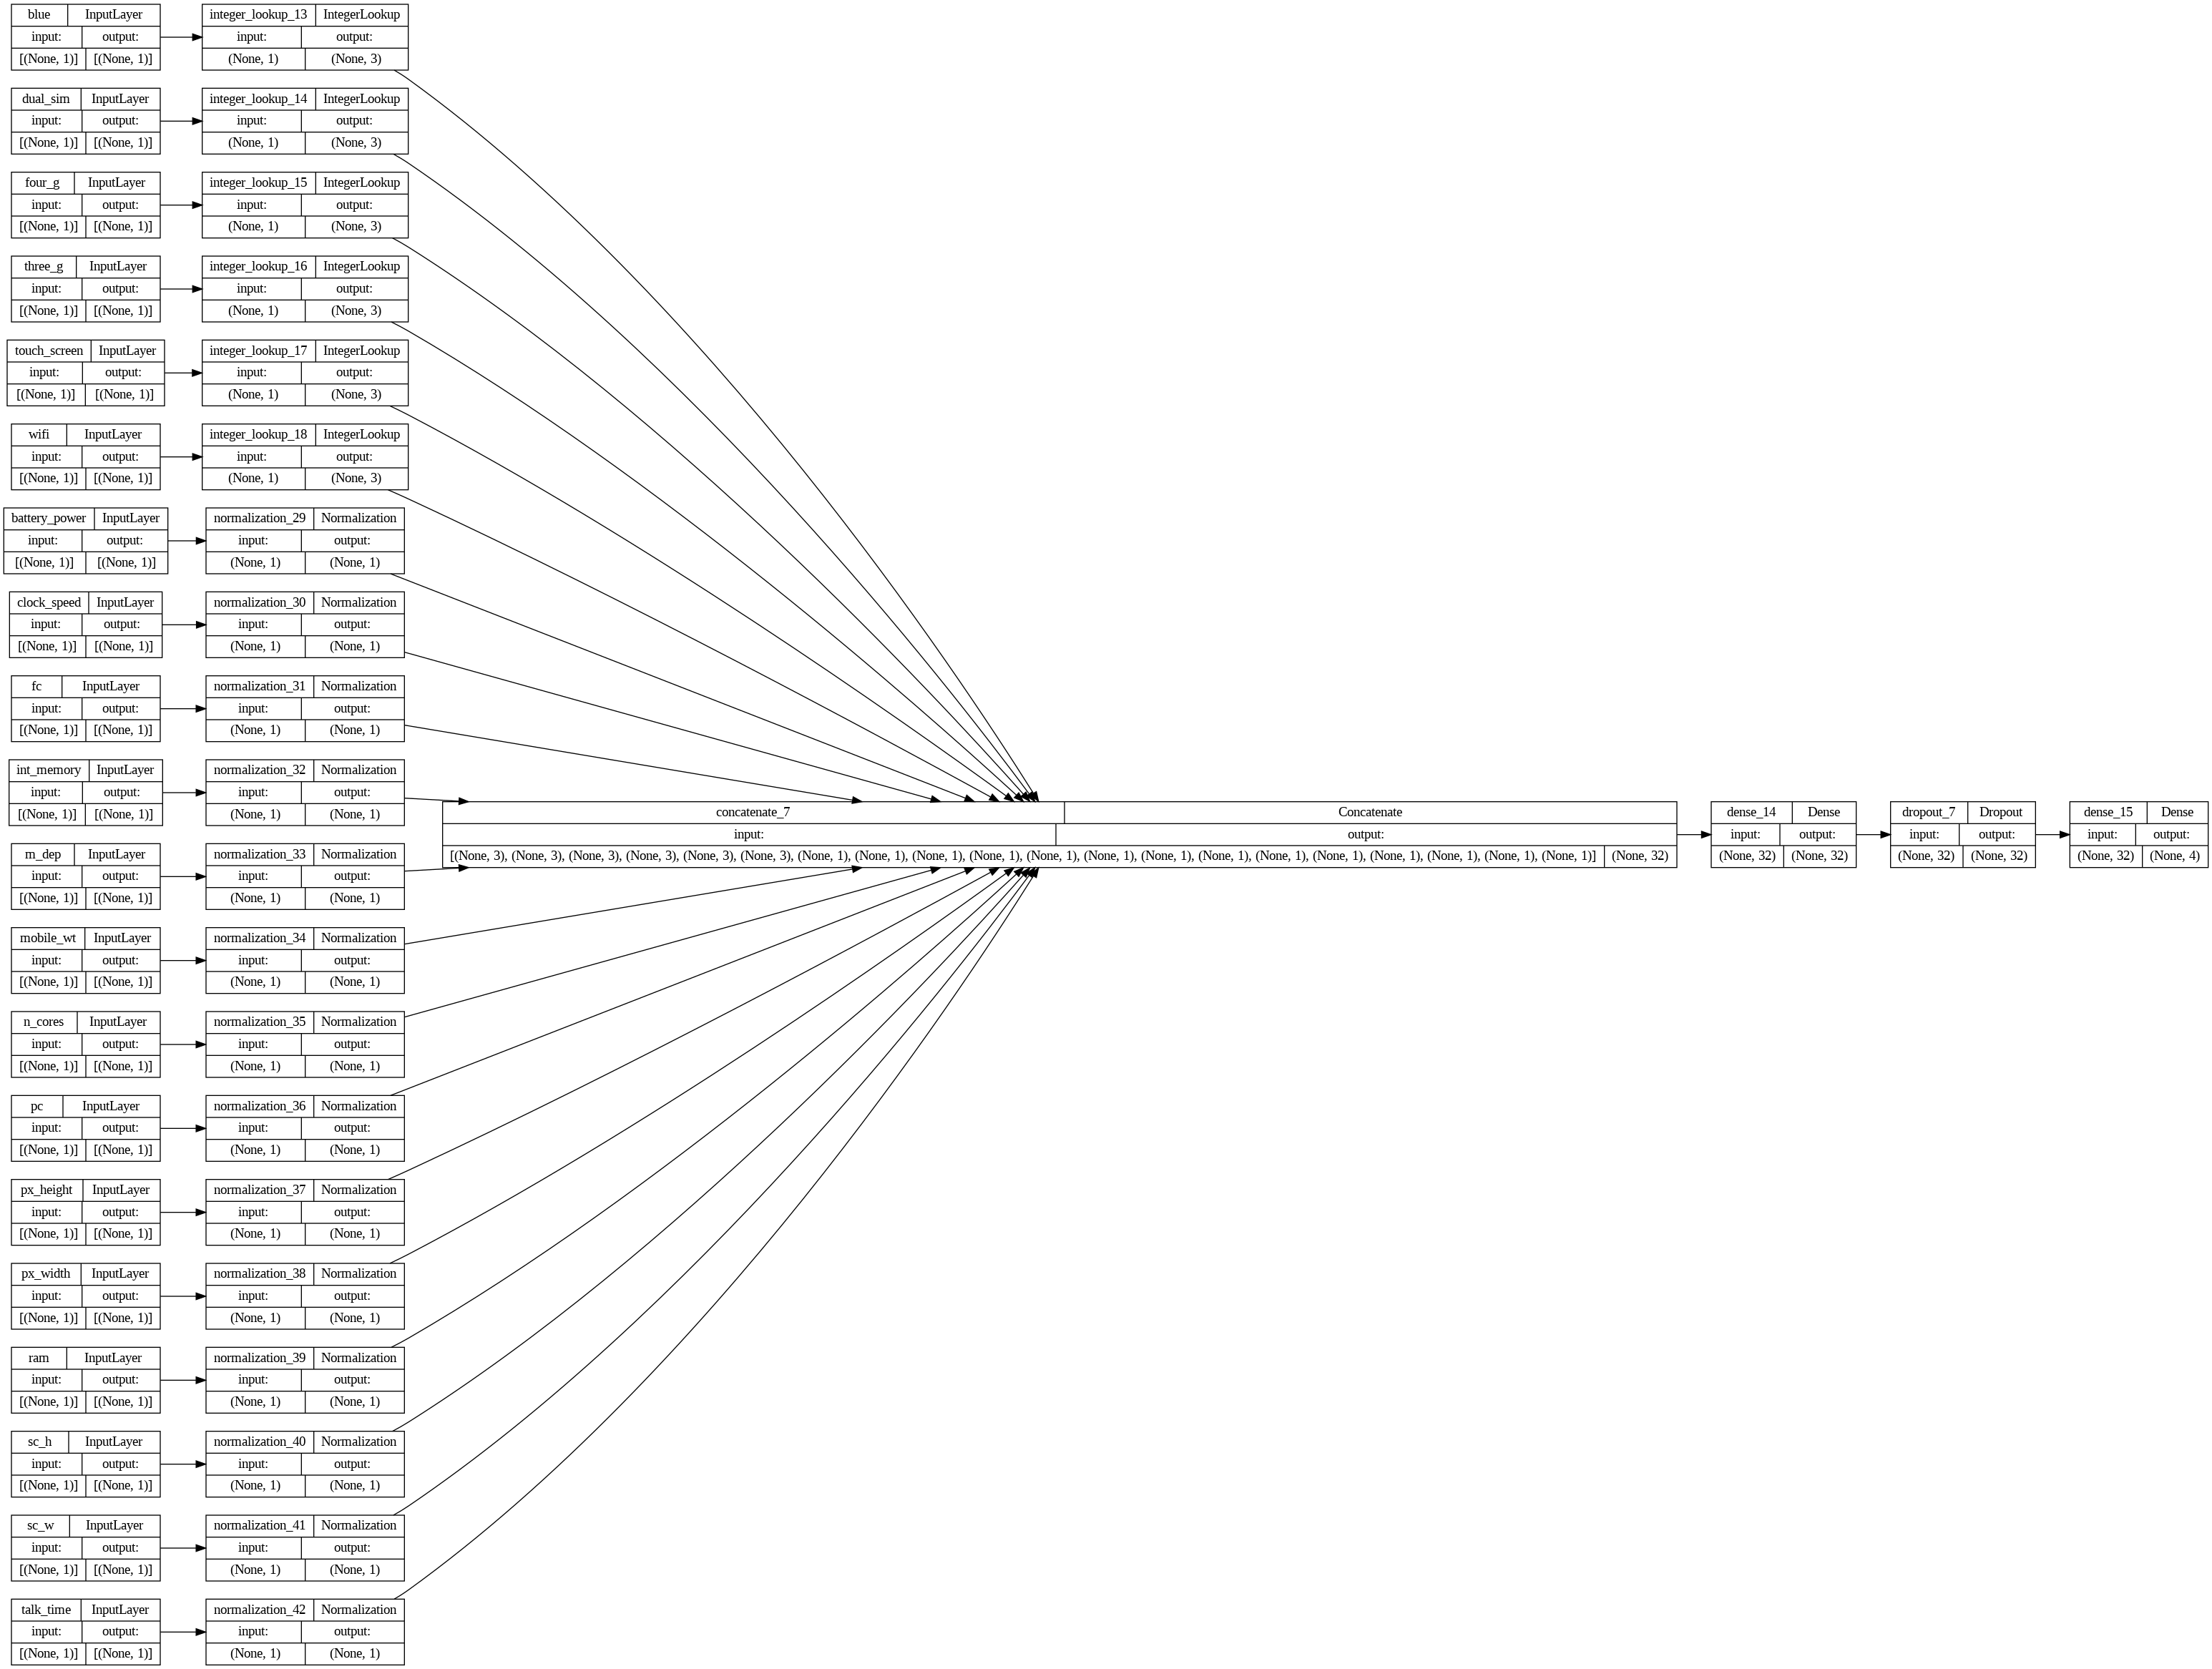

In [88]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Train the model

In [90]:
history=model.fit(train_ds, epochs=50,validation_data=val_ds)

Epoch 1/50
45/45 [==============================] - 1s 15ms/step - loss: 0.3873 - sparse_categorical_accuracy: 0.8603 - val_loss: 0.2843 - val_sparse_categorical_accuracy: 0.9526
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.3604 - sparse_categorical_accuracy: 0.8687 - val_loss: 0.2762 - val_sparse_categorical_accuracy: 0.9471
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.8687 - val_loss: 0.2691 - val_sparse_categorical_accuracy: 0.9443
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.3587 - sparse_categorical_accuracy: 0.8541 - val_loss: 0.2628 - val_sparse_categorical_accuracy: 0.9554
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.3484 - sparse_categorical_accuracy: 0.8715 - val_loss: 0.2550 - val_sparse_categorical_accuracy: 0.9499
Epoch 6/50
45/45 [==============================] - 0s 5ms/step - loss: 0.3504 - sparse_categorical_accuracy:

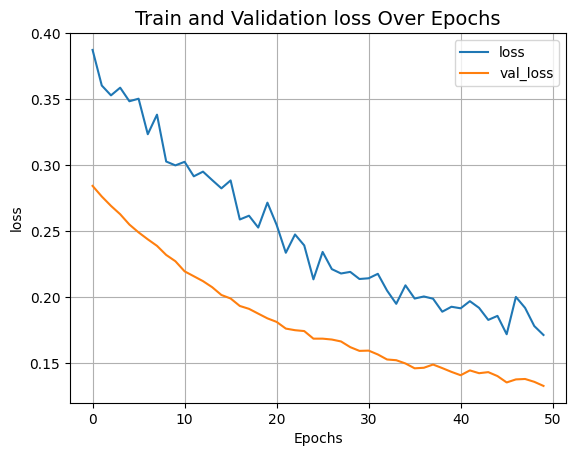

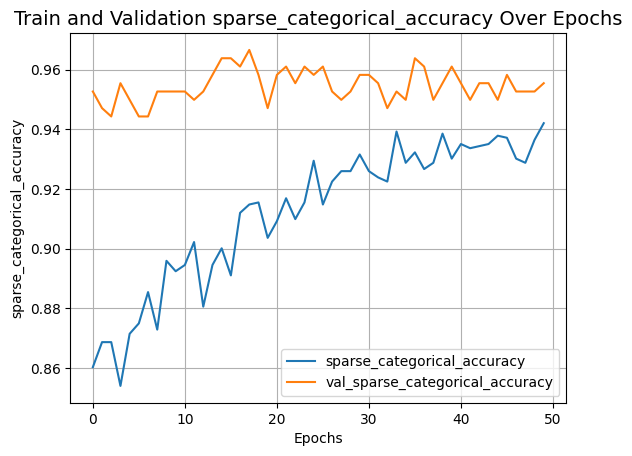

In [91]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("sparse_categorical_accuracy")

## Evaluate on new data


In [93]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
990,1483,1,2.6,1,13.0,0.0,19.0,0.6,146.0,7.0,...,361.0,1552.0,1587.0,9.0,4.0,19,0,0,0,1
342,1989,1,2.9,1,8.0,0.0,17.0,0.1,193.0,8.0,...,629.0,682.0,2369.0,7.0,0.0,18,1,1,0,2
794,967,1,1.6,0,4.0,0.0,25.0,0.6,92.0,8.0,...,243.0,1642.0,3076.0,7.0,4.0,18,0,1,1,2
1616,1986,1,0.5,1,7.0,1.0,39.0,0.1,89.0,7.0,...,251.0,599.0,3476.0,11.0,8.0,17,1,1,0,3
1432,630,0,2.0,0,9.0,1.0,14.0,0.5,180.0,8.0,...,66.0,1448.0,1212.0,12.0,8.0,12,1,0,0,0


In [95]:
Y_tests=df_test['price_range']
X_test=df_test.drop(columns=['price_range'])

In [96]:
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
990,1483,1,2.6,1,13.0,0.0,19.0,0.6,146.0,7.0,19.0,361.0,1552.0,1587.0,9.0,4.0,19,0,0,0
342,1989,1,2.9,1,8.0,0.0,17.0,0.1,193.0,8.0,15.0,629.0,682.0,2369.0,7.0,0.0,18,1,1,0
794,967,1,1.6,0,4.0,0.0,25.0,0.6,92.0,8.0,9.0,243.0,1642.0,3076.0,7.0,4.0,18,0,1,1
1616,1986,1,0.5,1,7.0,1.0,39.0,0.1,89.0,7.0,19.0,251.0,599.0,3476.0,11.0,8.0,17,1,1,0
1432,630,0,2.0,0,9.0,1.0,14.0,0.5,180.0,8.0,13.0,66.0,1448.0,1212.0,12.0,8.0,12,1,0,0


In [100]:
X_test.shape

(200, 20)

In [104]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred_prob_train = [model.predict(x) for x in X_test]
y_pred_train = [np.argmax(y, axis=1) for y in y_pred_prob_train]



conf_matrix_train = confusion_matrix(Y_tests, y_pred_train)

# Plotting the confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Training)")
plt.show()


IndexError: tuple index out of range

In [105]:
df_test = pd.read_csv("test - test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [106]:
df_test.isna().sum().sum() #to count the total occurrences of null in all columns

0

In [107]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [111]:
sample=X_test.iloc[0].to_dict()

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

1/1 [==============================] - 1s 931ms/step


array([1])

In [112]:
Y_tests.iloc[0]

1